In [4]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


In [5]:
import os
print("Current Dir ",os.getcwd())
curr_dir = os.getcwd()
train_path = os.path.join(curr_dir,"datasets","Train")
test_path = os.path.join(curr_dir,"datasets","Test")
valid_path = os.path.join(curr_dir,"datasets","Valid")

Current Dir  c:\Users\admin\Desktop\potato disesase detection


In [6]:
training_set = tf.keras.utils.image_dataset_from_directory(
    train_path,
    labels = "inferred",
    label_mode = "categorical",
    color_mode = "rgb",
    image_size = (128,128),
    shuffle = True,
    interpolation = "bilinear",
)

Found 900 files belonging to 3 classes.


In [7]:
training_set.class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [8]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    valid_path,
    labels = "inferred",
    label_mode = "categorical",
    color_mode = "rgb",
    image_size = (128,128),
    shuffle = True,
    interpolation = "bilinear",
)

Found 300 files belonging to 3 classes.


In [9]:
cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))


cnn.add(tf.keras.layers.Dropout(0.25))

cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.4))

cnn.add(tf.keras.layers.Dense(units=3,activation='softmax'))


c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
cnn.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy', metrics=['accuracy'])


In [11]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │         4,503 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,790,227 (29.72 MB)

 Trainable params: 7,790,227 (29.72 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 23s 672ms/step - accuracy: 0.2919 - loss: 1.4456 - val_accuracy: 0.3333 - val_loss: 1.1089
Epoch 2/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 23s 788ms/step - accuracy: 0.4142 - loss: 1.0484 - val_accuracy: 0.5067 - val_loss: 0.9457
Epoch 3/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 25s 861ms/step - accuracy: 0.6660 - loss: 0.6801 - val_accuracy: 0.6867 - val_loss: 0.7146
Epoch 4/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 25s 874ms/step - accuracy: 0.7358 - loss: 0.5784 - val_accuracy: 0.5967 - val_loss: 1.1551
Epoch 5/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 25s 858ms/step - accuracy: 0.6500 - loss: 0.7248 - val_accuracy: 0.8000 - val_loss: 0.4871
Epoch 6/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 26s 894ms/step - accuracy: 0.8443 - loss: 0.3739 - val_accuracy: 0.6933 - val_loss: 0.6475
Epoch 7/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 24s 825ms/step - accuracy: 0.8031 - loss: 0.4649 - val_accuracy: 0.8867 - val_loss: 0.2719
Epoch 8/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 26s 898ms/step - accuracy: 0.9089 - loss: 0.2182 - val_accu

In [13]:
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)


29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 152ms/step - accuracy: 0.9692 - loss: 0.0930
Training accuracy: 0.9633333086967468


In [15]:
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:',val_acc)

10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 145ms/step - accuracy: 0.9322 - loss: 0.1673
Validation accuracy: 0.9200000166893005


In [16]:
cnn.save('trained_plant_disease_model.keras')


In [17]:
training_history.history

{'accuracy': [0.3333333432674408,
  0.5255555510520935,
  0.695555567741394,
  0.7611111402511597,
  0.7177777886390686,
  0.8444444537162781,
  0.8500000238418579,
  0.9222221970558167,
  0.9277777671813965,
  0.9544444680213928],
 'loss': [1.23292076587677,
  0.9271256923675537,
  0.6180928945541382,
  0.5417143106460571,
  0.5977518558502197,
  0.3683851659297943,
  0.36735233664512634,
  0.19453555345535278,
  0.21198603510856628,
  0.11936773359775543],
 'val_accuracy': [0.3333333432674408,
  0.5066666603088379,
  0.6866666674613953,
  0.596666693687439,
  0.800000011920929,
  0.6933333277702332,
  0.8866666555404663,
  0.8366666436195374,
  0.9200000166893005,
  0.9200000166893005],
 'val_loss': [1.1089226007461548,
  0.9457309246063232,
  0.7145509719848633,
  1.1551450490951538,
  0.48709920048713684,
  0.64748615026474,
  0.2719326317310333,
  0.46520471572875977,
  0.2143886834383011,
  0.2098694145679474]}

AttributeError: module 'matplotlib.pyplot' has no attribute 'slow'

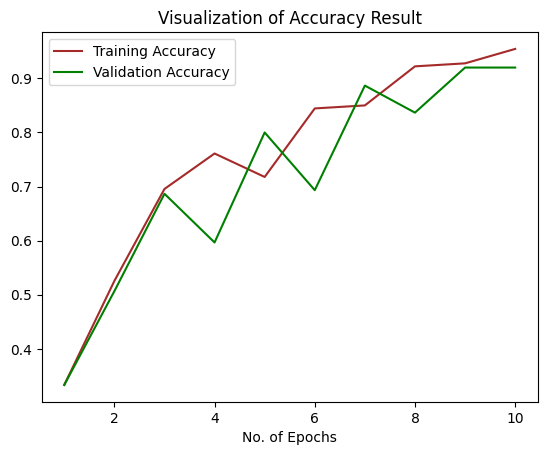

In [19]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='brown',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='green',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.slow()